<center>
    <img src='Pic/logo.jpg' width='400px'>
    <h1>CHƯƠNG 2: QUY TRÌNH XÂY DỰNG MỘT HỆ THỐNG HỌC MÁY - PHẦN 2</h1>
</center>

---


* Họ tên: Phạm Văn Thanh
* Mssv: 1921050540
* Lớp: DCCTKH64B

# THỰC HÀNH 4
---
**Mô tả tập dữ liệu:**

Tập dữ liệu Data_practice4 chứa dữ liệu của 961 bệnh nhân bị u vú.

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số [18-96 tuổi]
3. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
4. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)

**Yêu cầu 4.1:**
Đọc tập dữ liệu Data_Practice4.csv vào biến DataFrame, hiển thị thông tin của biến, 5 bản ghi đầu tiên và thống kê dữ liệu.


In [1]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path = 'Data/Data_Practice4.csv'

# Hiển thị thông tin của biến
DataFrame = pd.read_csv(path)
DataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Age        956 non-null    float64
 2   Shape      930 non-null    object 
 3   Margin     913 non-null    object 
 4   Density    885 non-null    object 
 5   Target     961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


In [2]:
# Hiển thị 5 bản ghi đầu tiên
DataFrame.head()

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1


In [3]:
# Thống kê dữ liệu
DataFrame.describe()

,Age,Target
count,956.000000,961.000000
mean,55.487448,0.463059
std,14.480131,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


In [4]:
DataFrame.describe(include=['O'])

,PatientID,Shape,Margin,Density
count,961,930,913,885
unique,961,4,5,4
top,P1,Irregular,Circumscribed,Low
freq,1,400,357,798


**Yêu cầu 4.2:**
Thông kê dữ liệu missing cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

In [5]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

In [6]:
missing_values(DataFrame)

File dữ liệu bao gồm có: 6 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


In [7]:
# Missing thuộc tính Density
DataFrame[DataFrame['Density'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
1,P2,43.0,Round,Circumscribed,NaN,1
4,P5,74.0,Round,Spiculated,NaN,1
19,P20,40.0,Round,NaN,NaN,0
22,P23,43.0,Round,NaN,NaN,0
26,P27,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...,...
614,P615,46.0,NaN,Spiculated,NaN,1
627,P628,57.0,Oval,Circumscribed,NaN,0
665,P666,27.0,Oval,Circumscribed,NaN,0
677,P678,57.0,Irregular,ill-defined,NaN,1


In [8]:
# Missing thuộc tính Margin
DataFrame[DataFrame['Margin'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
5,P6,65.0,Round,NaN,Low,0
6,P7,70.0,NaN,NaN,Low,0
7,P8,42.0,Round,NaN,Low,0
12,P13,64.0,Round,NaN,Low,0
19,P20,40.0,Round,NaN,NaN,0
20,P21,66.0,NaN,NaN,High,1
22,P23,43.0,Round,NaN,NaN,0
27,P28,63.0,Lobular,NaN,Low,0
35,P36,77.0,Lobular,NaN,NaN,0
48,P49,42.0,NaN,NaN,Fat-containing,0


In [9]:
# Missing thuộc tính Shape
DataFrame[DataFrame['Shape'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
6,P7,70.0,NaN,NaN,Low,0
9,P10,60.0,NaN,Spiculated,High,1
20,P21,66.0,NaN,NaN,High,1
48,P49,42.0,NaN,NaN,Fat-containing,0
54,P55,53.0,NaN,Spiculated,Low,1
74,P75,70.0,NaN,ill-defined,NaN,1
83,P84,57.0,NaN,ill-defined,High,0
128,P129,52.0,NaN,ill-defined,NaN,0
157,P158,51.0,NaN,NaN,Low,0
163,P164,53.0,NaN,ill-defined,Low,0


In [10]:
# Missing thuộc tính Age
DataFrame[DataFrame['Age'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
443,P444,NaN,Irregular,Spiculated,Low,1
453,P454,NaN,Irregular,ill-defined,Low,1
683,P684,NaN,Lobular,Obscured,Low,1
884,P885,NaN,Irregular,ill-defined,Low,1
923,P924,NaN,Irregular,Obscured,Low,1


**Yêu cầu 4.3:** Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target] 


* Mức độ ảnh hưởng của thuộc tính Age đối với thuộc tính Target


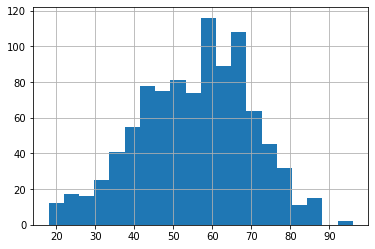

In [12]:
plt.hist(DataFrame.Age,bins=20)
plt.grid(True)
plt.show()

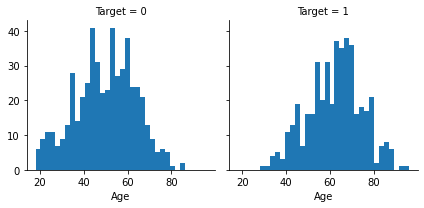

In [13]:
g = sns.FacetGrid(DataFrame, col='Target')
g.map(plt.hist, 'Age', bins=30)

Quan sát dữ liệu :
* Dựa theo bảng phân tích khối u ác tính xuất hiện nhiều nhất ở người có độ tuổi 64
* Những bệnh nhân từ 20 đến 40 tuổi thường sẽ là khối u lành tính
* Còn những bệnh nhân từ 40 đến 80 tuổi sẽ dễ mắc khối u ác tính hơn


In [1]:

DataFrame[['Age', 'Target']].groupby(['Age'], as_index=False).mean().sort_values(by='Target', ascending=False)

NameError: name 'DataFrame' is not defined


* Mức độ ảnh hưởng của thuộc tính Shape đối với thuộc tính Target

In [15]:
# Thuộc tính Shape
DataFrame[['Shape', 'Target']].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


* Mức độ ảnh hưởng của thuộc tính Margin đối với thuộc tính Target

In [16]:
# Thuộc tính Margin
DataFrame[['Margin', 'Target']].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


* Mức độ ảnh hưởng của thuộc tính Density đối với thuộc tính Target

In [17]:
# Thuộc tính Density
DataFrame[['Density', 'Target']].groupby(['Density'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


**Yêu cầu 4.4:** Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy và lưu kết quả dữ liệu sau xử lý ra file Data_Practice4_ok.csv 


In [13]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}
# Loại bỏ thuộc tính không quan trọng
df_data_ex4 = DataFrame.drop(['PatientID', 'Margin'], axis=1)
df_data_ex4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Density  885 non-null    object 
 3   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 30.2+ KB


---
Xử lý các thuộc tính missing value
---

In [14]:

missing_values(df_data_ex4)

File dữ liệu bao gồm có: 4 cột.
Có 3 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Shape,31,3.23
Age,5,0.52


---
* Xử lý giá trị mất mát của thuộc tính Density
---

In [15]:

df_data_ex4[df_data_ex4['Density'].isnull()]

,Age,Shape,Density,Target
1,43.0,Round,NaN,1
4,74.0,Round,NaN,1
19,40.0,Round,NaN,0
22,43.0,Round,NaN,0
26,66.0,Round,NaN,0
...,...,...,...,...
614,46.0,NaN,NaN,1
627,57.0,Oval,NaN,0
665,27.0,Oval,NaN,0
677,57.0,Irregular,NaN,1


In [16]:
#Thống kê số lượng bệnh nhân theo Density:
df_data_ex4['Density'].value_counts()

Low               798
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

Trong 4 giá trị Low, Iso, High, Fat-containing có số lần xuất hiện như sau:
* Low               798(83%)
* Iso                59(6%)
* High               16(1,7%)
* Fat-containing     12(1,2%)

==> Xử lý thuộc tính Density bằng giá trị xuất hiện nhiều nhất trong dữ liệu đó là mật độ Low

In [17]:
df_data_ex4['Density'] = df_data_ex4['Density'].fillna('Low')

In [18]:
#Thống kê dữ liệu sau khi xử lý missing thuộc tính Density
df_data_ex4.isnull().sum()

Age         5
Shape      31
Density     0
Target      0
dtype: int64

---
* Xử lý giá trị mất mát của thuộc tính Shape
---

In [19]:
df_data_ex4[df_data_ex4['Shape'].isnull()]

,Age,Shape,Density,Target
6,70.0,NaN,Low,0
9,60.0,NaN,High,1
20,66.0,NaN,High,1
48,42.0,NaN,Fat-containing,0
54,53.0,NaN,Low,1
74,70.0,NaN,Low,1
83,57.0,NaN,High,0
128,52.0,NaN,Low,0
157,51.0,NaN,Low,0
163,53.0,NaN,Low,0


In [20]:
#Thống kê số lượng bệnh nhân theo Shape:
df_data_ex4['Shape'].value_counts()

Irregular    400
Round        224
Oval         211
Lobular       95
Name: Shape, dtype: int64

In [21]:
95/961

0.09885535900104059

Trong 4 giá trị Irregular, Round, Oval, Lobular có số lần xuất hiện như sau:
* Irregular    400(42%)
* Round        224(23%)
* Oval         211(22%)
* Lobular       95(10%)

==> Xử lý thuộc tính Shape bằng giá trị xuất hiện nhiều nhất trong dữ liệu đó là hình dạng Irregular

In [22]:
df_data_ex4['Shape'] = df_data_ex4['Shape'].fillna('Irregular')

In [23]:
#Thống kê dữ liệu sau khi xử lý missing thuộc tính Density
df_data_ex4.isnull().sum()

Age        5
Shape      0
Density    0
Target     0
dtype: int64

---
* Xử lý giá trị mất mát của thuộc tính Age
---

In [24]:
df_data_ex4[df_data_ex4['Age'].isnull()]

,Age,Shape,Density,Target
443,NaN,Irregular,Low,1
453,NaN,Irregular,Low,1
683,NaN,Lobular,Low,1
884,NaN,Irregular,Low,1
923,NaN,Irregular,Low,1


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


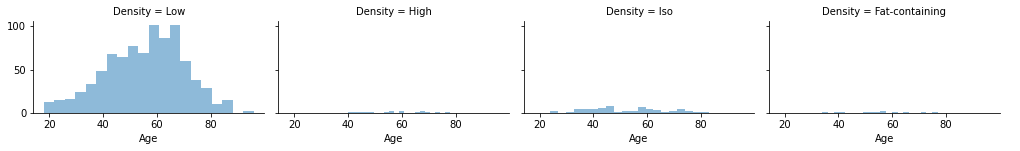

In [25]:
# Ta thấy tuổi(Age) có tương quan với mật độ khối u(Density)
grid = sns.FacetGrid(df_data_ex4, col='Density', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**Bởi vậy sẽ cần ước chừng giá trị Age tại các vị trí thiếu sử dụng các giá trị trung bình của thuộc tính Age theo tập của thuộc tính Density**

In [26]:
#Xử lý missing nhóm 1:
# Xác định tuổi trung bình của bệnh nhân có Density là Low
#Danh sách các hành khách thỏa mãn:
df_1 =  df_data_ex4[(df_data_ex4['Density']=='Low')]

In [27]:
Age_mean_1 = round(df_1['Age'].mean(),0)
print('Tuổi trung bình của nhóm bệnh nhân có Density là Low:', Age_mean_1)

Tuổi trung bình của nhóm bệnh nhân có Density là Low: 56.0


In [28]:
#Thay thế tuổi của các bệnh nhân có Density là Low bị missing bằng tuổi trung bình của nhóm này
df_data_ex4[(df_data_ex4['Density']=='Low') & (df_data_ex4['Age'].isnull())]

,Age,Shape,Density,Target
443,NaN,Irregular,Low,1
453,NaN,Irregular,Low,1
683,NaN,Lobular,Low,1
884,NaN,Irregular,Low,1
923,NaN,Irregular,Low,1


In [30]:
df_data_ex4.loc[(df_data_ex4['Density']=='Low')  & (df_data_ex4['Age'].isnull()),\
            'Age'] = Age_mean_1

In [33]:
#Xem lại dữ liệu sau xử lý:
df_data_ex4.iloc[[443,453,683,884,923],:]

,Age,Shape,Density,Target
443,56.0,Irregular,Low,1
453,56.0,Irregular,Low,1
683,56.0,Lobular,Low,1
884,56.0,Irregular,Low,1
923,56.0,Irregular,Low,1


In [32]:
print('Ta thấy vì các ô dữ liệu bị missing ở Age có Density đều là Low nên không phải làm các trường hợp Density =(Iso,High,Fat-containing)')

Ta thấy vì các ô dữ liệu bị missing ở Age có Density đều là Low nên không phải làm các trường hợp Density =(Iso,High,Fat-containing)


---
**Rời rạc hóa dữ liệu**

* Đối với Age

In [34]:
#Tính tỷ lệ bệnh nhân bị bệnh theo độ tuổi:
n=5
df_temp = df_data_ex4.copy()
df_temp['AgeBand'] = pd.cut(df_temp['Age'], n)

df_temp[['AgeBand', 'Target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Target
0,"(17.922, 33.6]",0.057143
1,"(33.6, 49.2]",0.269076
2,"(49.2, 64.8]",0.460274
3,"(64.8, 80.4]",0.726908
4,"(80.4, 96.0]",0.892857


**Ta thấy rằng, tỷ lệ bệnh nhân có bệnh quan hệ theo độ tuổi. Thực hiện chia dữ liệu độ tuổi theo từng đoạn**

* Từ  18 --> 34 tuổi:   có tỷ lệ bị bệnh cao thứ năm (5.7%)
* Từ 34 --> 49 tuổi:   có tỷ lệ bị bệnh cao thứ tư (26.9%)
* Từ 49 --> 65 tuổi:   có tỷ lệ bị bệnh cao thứ ba (46%)
* Từ 65 --> 80 tuổi:   có tỷ lệ bị bệnh cao thứ hai (73%)
* Trên 80 tuổi     :   có tỷ lệ bị bệnh thấp nhất (89%)

In [2]:
df_temp

NameError: name 'df_temp' is not defined

**Thay thế tuổi tuyệt đối của bệnh nhân bằng khoảng mà tuổi thuộc vào:**
* Từ 18 --> 34 tuổi:   --> Age = 0
* Từ 34 --> 49 tuổi:   --> Age = 1
* Từ 49 --> 65 tuổi:   --> Age = 2
* Từ 65 --> 80 tuổi:   --> Age = 3
* Trên 80 tuổi:        --> Age = 4

In [38]:
df_data_ex4.loc[(df_data_ex4['Age'] > 18) & (df_data_ex4['Age'] <= 34), 'Age'] = 0
df_data_ex4.loc[(df_data_ex4['Age'] > 34) & (df_data_ex4['Age'] <= 49), 'Age'] = 1
df_data_ex4.loc[(df_data_ex4['Age'] > 49) & (df_data_ex4['Age'] <= 65), 'Age'] = 2
df_data_ex4.loc[(df_data_ex4['Age'] > 65) & (df_data_ex4['Age'] <= 80), 'Age'] = 3
df_data_ex4.loc[ df_data_ex4['Age'] > 80, 'Age'] = 4

In [39]:
df_data_ex4

,Age,Shape,Density,Target
0,3.0,Lobular,Low,1
1,1.0,Round,Low,1
2,2.0,Irregular,Low,1
3,0.0,Round,Low,0
4,3.0,Round,Low,1
...,...,...,...,...
956,1.0,Oval,Low,0
957,2.0,Irregular,Low,1
958,2.0,Irregular,Low,0
959,3.0,Irregular,Low,1


---
* Đối với Shape


** Ta sẽ thay thế giá trị như sau
* Round ==> Shape = 0
* Oval ==> Shape = 1
* Lobular ==> Shape = 2
* Irregular ==> Shape = 3

In [40]:
df_data_ex4.loc[(df_data_ex4['Shape'] == 'Round'), 'Shape'] = 0
df_data_ex4.loc[(df_data_ex4['Shape'] == 'Oval'), 'Shape'] = 1
df_data_ex4.loc[(df_data_ex4['Shape'] == 'Lobular'), 'Shape'] = 2
df_data_ex4.loc[(df_data_ex4['Shape'] == 'Irregular'), 'Shape'] = 3

In [41]:
df_data_ex4

,Age,Shape,Density,Target
0,3.0,2,Low,1
1,1.0,0,Low,1
2,2.0,3,Low,1
3,0.0,0,Low,0
4,3.0,0,Low,1
...,...,...,...,...
956,1.0,1,Low,0
957,2.0,3,Low,1
958,2.0,3,Low,0
959,3.0,3,Low,1


---
* Đối với Density


** Ta sẽ thay thế giá trị như sau
* High ==> Density = 0
* Iso ==> Density = 1
* Low ==> Density = 2
* Fat-containing ==> Density = 3

In [43]:
df_data_ex4.loc[(df_data_ex4['Density'] == 'High'), 'Density'] = 0
df_data_ex4.loc[(df_data_ex4['Density'] == 'Iso'), 'Density'] = 1
df_data_ex4.loc[(df_data_ex4['Density'] == 'Low'), 'Density'] = 2
df_data_ex4.loc[(df_data_ex4['Density'] == 'Fat-containing'), 'Density'] = 3

In [44]:
df_data_ex4

,Age,Shape,Density,Target
0,3.0,2,2,1
1,1.0,0,2,1
2,2.0,3,2,1
3,0.0,0,2,0
4,3.0,0,2,1
...,...,...,...,...
956,1.0,1,2,0
957,2.0,3,2,1
958,2.0,3,2,0
959,3.0,3,2,1



Lưu dữ liệu ra file Data_Practice4_ok.csv
---

In [46]:
df_data_ex4.to_csv('Data_Practice4_ok.csv',index=None)